In [23]:
from sktime.datasets import load_airline
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
from sktime.forecasting.arima import ARIMA
from sktime.forecasting.compose import TransformedTargetForecaster
from sktime.transformations.series.detrend import Deseasonalizer
from sklearn.neighbors import KNeighborsRegressor
from sktime.forecasting.compose import make_reduction
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.transformations.series.detrend import Detrender
from sktime.forecasting.compose import make_reduction
import datetime as dt
import json
import numpy as np
import pandas as pd
y = load_airline()

In [61]:
    def forecast_naive(timeseries_data, horizon, seasonality_period):
        y = timeseries_data
    # step 2: specifying forecasting horizon
        fh = np.arange(1, horizon+1)

    # step 3: specifying the forecasting algorithm
        forecaster = NaiveForecaster(strategy="last", sp=seasonality_period)

    # step 4: fitting the forecaster
        forecaster.fit(y, fh=fh)

    # step 5: querying predictions
        y_pred = forecaster.predict()

    # optional: plotting predictions and past data
        plot_series(y, y_pred, labels=["y", "y_pred"])
    
    def forecast_kneighbors_test(timeseries_data, test_size):
        y = timeseries_data
        y_train, y_test = temporal_train_test_split(y, test_size=test_size)
    # we can simply take the indices from `y_test` where they already are stored
        fh = ForecastingHorizon(y_test.index, is_relative=False)

        regressor = KNeighborsRegressor(n_neighbors=1)
        forecaster = make_reduction(regressor, window_length=15, strategy="recursive")
        forecaster.fit(y_train)
        y_pred = forecaster.predict(fh)
        plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
        print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_test, y_pred, symmetric=False))
        
    def forecast_arima_test(timeseries_data, test_size):
        y = timeseries_data
        y_train, y_test = temporal_train_test_split(y, test_size=test_size)
    # we can simply take the indices from `y_test` where they already are stored
        fh = ForecastingHorizon(y_test.index, is_relative=False)

        forecaster = ARIMA(
            order=(1, 1, 0), seasonal_order=(0, 1, 0, 12), suppress_warnings=True
        )

        forecaster.fit(y_train)
        y_pred = forecaster.predict(fh)
        plot_series(y_train, y_test, y_pred, labels=["y_train", "y_test", "y_pred"])
        print("Mean Absolute Percentage Error (MAPE):", mean_absolute_percentage_error(y_test, y_pred, symmetric=False))


Mean Absolute Percentage Error (MAPE): 0.04356744949188808


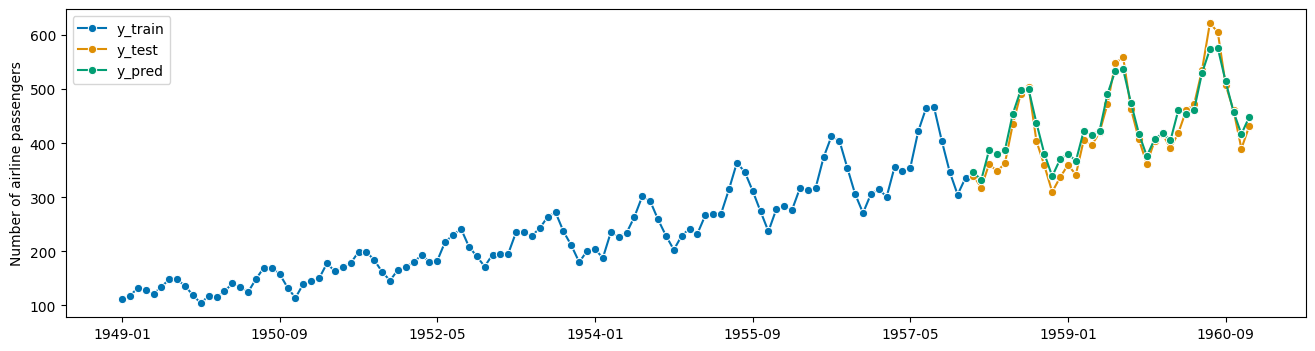

In [62]:
forecast_arima_test(timeseries_data=y, test_size=36)

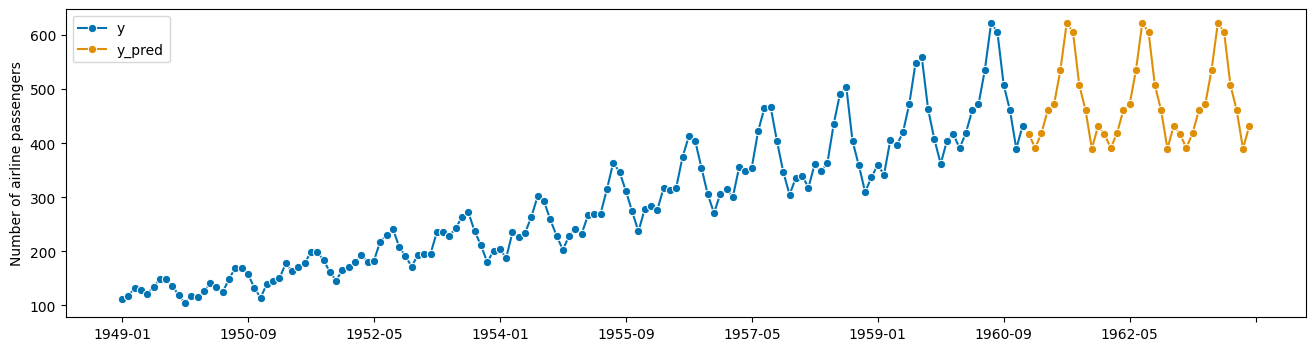

In [63]:
forecast_naive(timeseries_data=y, horizon=36, seasonality_period=12)

Mean Absolute Percentage Error (MAPE): 0.12887507224382988


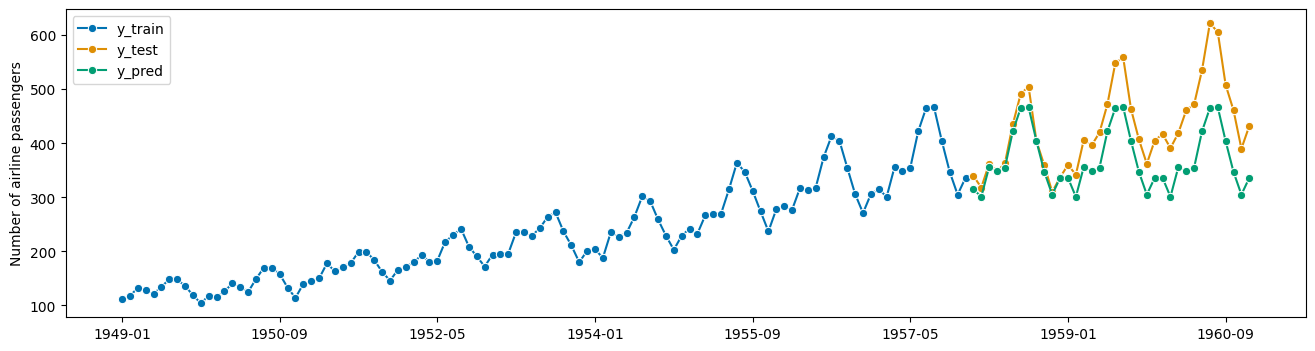

In [64]:
forecast_kneighbors_test(timeseries_data=y, test_size=36)